In [1]:
import imageio
import matplotlib.pylab as plt
import numpy as np

In [2]:
img = np.asarray(imageio.imread("lena.png"))
img.shape

(512, 512, 3)

In [3]:
def draw_lena(lena_pic, colored=False):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(lena_pic)
    else:
        plt.imshow(lena_pic, cmap="gray")

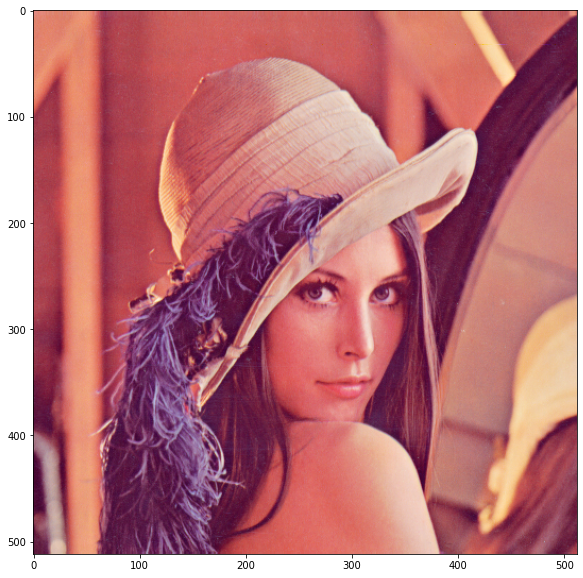

In [4]:
(r, g, b) = img.transpose((2, 0, 1))
draw_lena(img, colored=True)

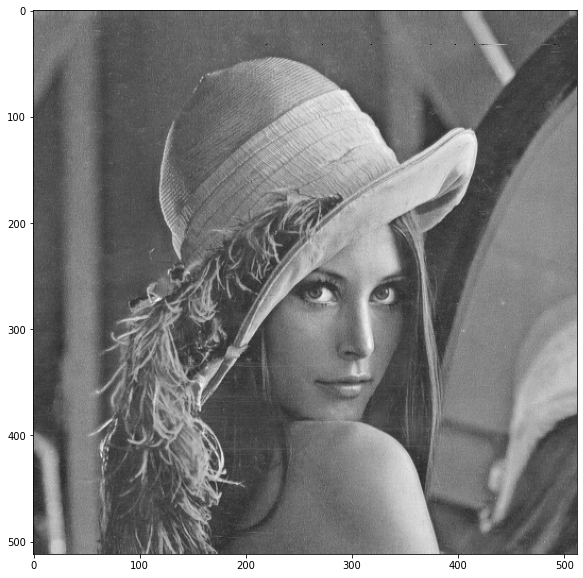

In [5]:
from image_filters import to_grayscale

monochromed = to_grayscale(img)
draw_lena(monochromed)

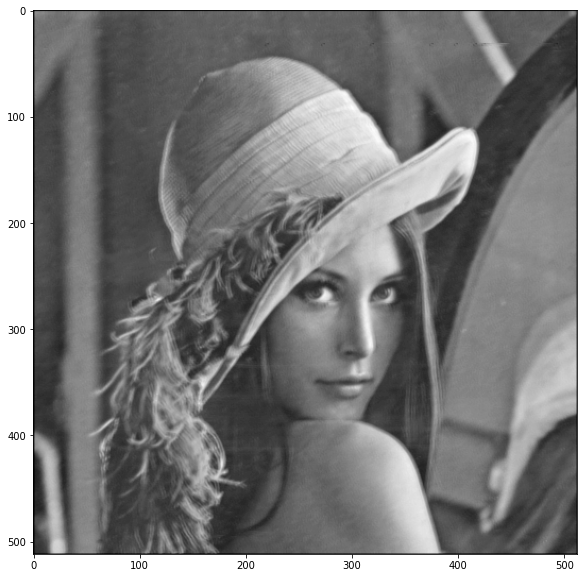

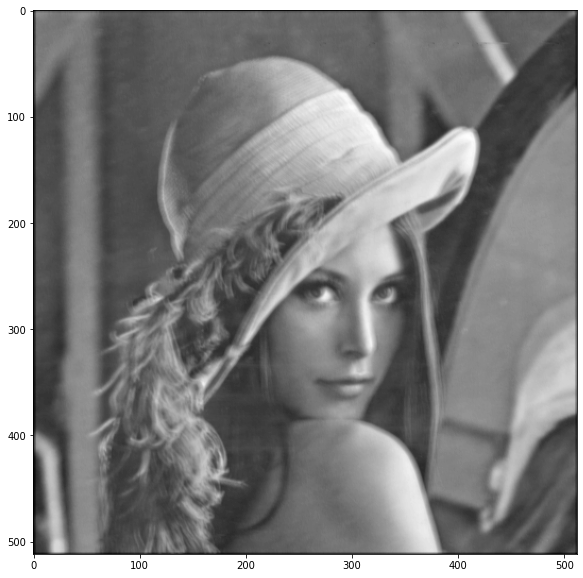

In [6]:
from image_filters import gaussian_blur, apply_filter

gauss_blured1 = gaussian_blur(np.stack([monochromed]), False)

draw_lena(gauss_blured1[0])

gauss = np.asarray([
    [1, 1, 2,  2, 2, 1, 1],
    [1, 2, 2,  4, 2, 2, 1],
    [2, 2, 4,  8, 4, 2, 2],
    [2, 4, 8, 16, 8, 4, 2],
    [2, 2, 4,  8, 4, 2, 2],
    [1, 2, 2,  4, 2, 2, 1],
    [1, 1, 2,  2, 2, 1, 1],
], dtype="int64")
gauss_blured2 = apply_filter(np.stack([monochromed]), gauss, False)
draw_lena(gauss_blured2[0])

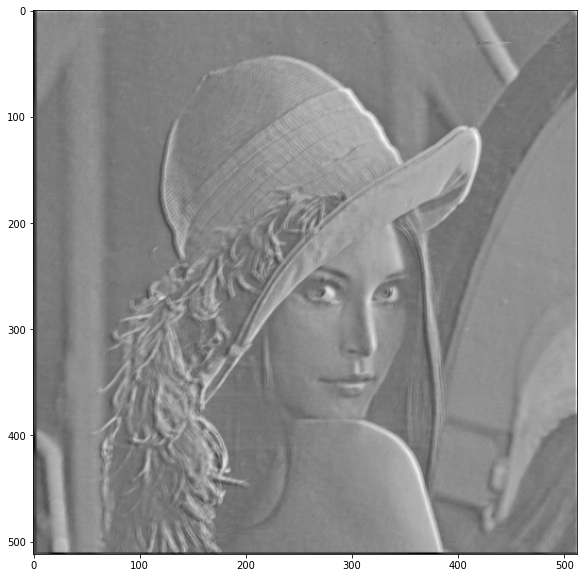

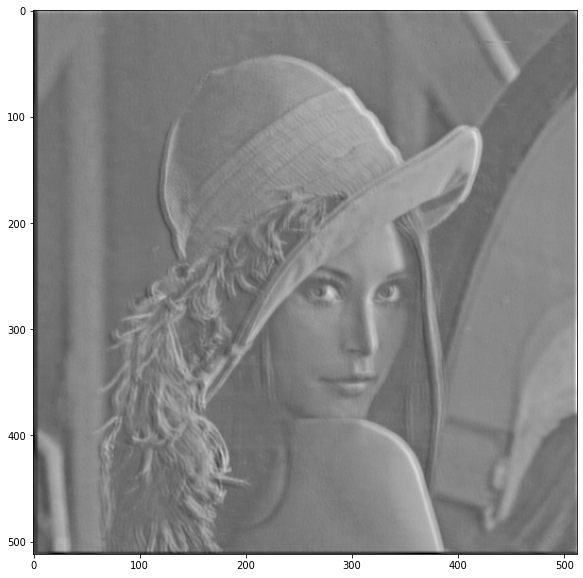

In [7]:
from image_filters import apply_filter

laplacian_filter = np.asarray([
     [0,  0, -1,  0,  0],
     [0, -1, -2, -1,  0],
    [-1, -2, 16, -2, -1],
     [0, -1, -2, -1,  0],
     [0,  0, -1,  0,  0],
], dtype="int64")
laplaced = apply_filter(gauss_blured1, laplacian_filter, False)

draw_lena(laplaced[0])

laplaced = apply_filter(gauss_blured2, laplacian_filter, False)

draw_lena(laplaced[0])

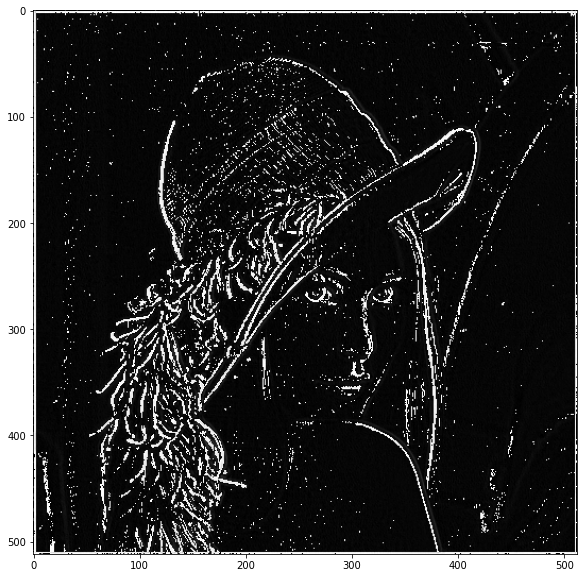

In [8]:
diff = gauss_blured2[0] - gauss_blured1[0]

draw_lena(diff)